<a href="https://colab.research.google.com/github/ivaben/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [62]:
# import panda

import pandas as pd



zoo_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
  

  


aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
flea,0,0,1,0,0,0,0,0,0,1,0

In [63]:
# Load the zoo dataset from its URL:

zoo = pd.read_csv(zoo_data_url)

# show the first five rows from zoo datatset
zoo.head()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [64]:
# show the last 5 rows from zoo datatset

zoo.tail()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
99,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [65]:
column_headers = ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
                  'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 
                  'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 
                  'type']

zoo = pd.read_csv(zoo_data_url, header=None, names=column_headers)
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [66]:


# first method with !curl
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
flea,0,0,1,0,0,0,0,0,0,1,0

In [68]:
# load the zoo dataset  from local machine
from google.colab import files
uploaded = files.upload()

Saving zoo.data to zoo (2).data


In [69]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [70]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [71]:
print(zoo.shape)
zoo.head()

# zoo dataset contains 101 rows and 18 columns, UCI page has 101 rows and 17 columns, this is because that UCI page does not count the Y variable

(101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [72]:
# something that we can discover about this zoo dataset for example zoo.dtypes, or zoo.describe
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [73]:
# try look at missing values
zoo.isnull().sum()

# there is not missing value and my analysis corroborates with UCI report

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [78]:
# import numpy
import numpy as np

print(np.NaN)

nan


In [79]:
zoo['aquatic'][3]

0

In [80]:
# replacement "0" value with NaN
zoo = zoo.replace(zoo['aquatic'][3], np.NaN)
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0,1
1,antelope,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,1
2,bass,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,4
3,bear,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0,1
4,boar,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,1


In [81]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           43 non-null float64
feathers       20 non-null float64
eggs           59 non-null float64
milk           41 non-null float64
airborne       24 non-null float64
aquatic        36 non-null float64
predator       56 non-null float64
toothed        61 non-null float64
backbone       83 non-null float64
breathes       80 non-null float64
venomous       8 non-null float64
fins           17 non-null float64
legs           78 non-null float64
tail           75 non-null float64
domestic       13 non-null float64
catsize        44 non-null float64
type           101 non-null int64
dtypes: float64(16), int64(1), object(1)
memory usage: 14.3+ KB


In [82]:
# there are right now missing values
zoo.isnull().sum()

animal name     0
hair           58
feathers       81
eggs           42
milk           60
airborne       77
aquatic        65
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

In [83]:
# location of special positions
zoo.iloc[7][17]

4

In [84]:
zoo.iloc[20][2]

1.0

In [102]:
# let's back to original dataset and to try another reading
zoo = pd.read_csv(zoo_data_url)
zoo.head()

column_headers = ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
                  'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 
                  'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 
                  'type']

zoo = pd.read_csv(zoo_data_url, header=None, names=column_headers)
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [103]:
# another reading of dataset
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [104]:
# Use crosstab to show the difference instances of the categorical variables

pd.crosstab(zoo['feathers'], zoo['predator'])

predator,0,1
feathers,,
0,34,47
1,11,9


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [106]:
# Histogram
zoo['tail'].describe()

count    101.000000
mean       0.742574
std        0.439397
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: tail, dtype: float64

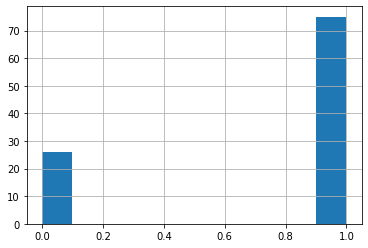

In [107]:
zoo['tail'].hist()

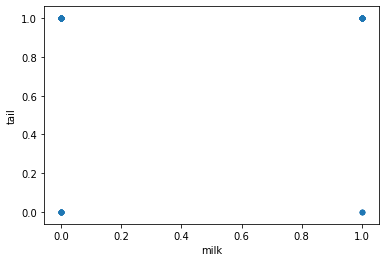

In [109]:
#Scatterplots
zoo.plot.scatter('milk', 'tail');

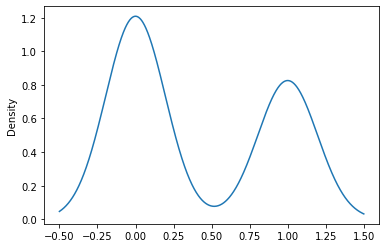

In [111]:
#density plots
zoo['milk'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [113]:
# Your Code Here

pd.crosstab(zoo['tail'], zoo['milk'])

milk,0,1
tail,,
0,20,6
1,40,35


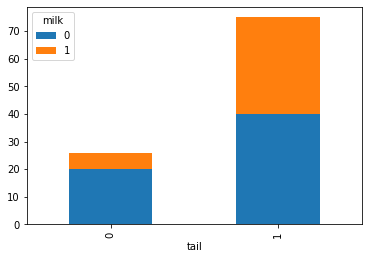

In [115]:
pd.crosstab(zoo['tail'], zoo['milk']).plot(kind='bar', stacked='true');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.